In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, how ='outer', on='city')
# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#Making sure all rows have values
df.dtypes
df.count()
#Group by city to calculatre mean fare by city
cityGroup = df.groupby(["city"])
cityMean = cityGroup.mean()
cityMean.head()
#Mean fare per city
cityFare =  cityMean["fare"]
cityFare.head()
#Count to calculate total # of rides per city
cityCount = cityGroup.count()
cityCount.head()
#Total rides per city
cityRides = cityCount["fare"]
cityRides.head()
# Driver vount by city
cityDriver = cityMean["driver_count"]
cityDriver.head()

city
Amandaburgh      12.0
Barajasview      26.0
Barronchester    11.0
Bethanyland      22.0
Bradshawfurt      7.0
Name: driver_count, dtype: float64

In [3]:
#Create summary dataframe
summarydf = pd.DataFrame({"Average Fare" : cityFare, "Total Number of Rides": cityRides,                           
                          "Total Number of Drivers": cityDriver})
#Reset index, which allows merging of summary table with original city dataframe to get city type
summarydf.reset_index()
summarydf=pd.merge(summarydf, city_df, how='outer', on='city')
summarydf.head()

,city,Average Fare,Total Number of Rides,Total Number of Drivers,driver_count,type
0,Amandaburgh,24.641667,18,12.0,12,Urban
1,Barajasview,25.332273,22,26.0,26,Urban
2,Barronchester,36.422500,16,11.0,11,Suburban
3,Bethanyland,32.956111,18,22.0,22,Suburban
4,Bradshawfurt,40.064000,10,7.0,7,Rural


## Bubble Plot of Ride Sharing Data

In [4]:
#Get city types, returns Urban, Suburban, Rural
summarydf["type"].unique()

#Create summary table of just urban cities
urbanLoc = summarydf.loc[summarydf["type"] == "Urban", :]
urbanLoc.head()
#Create summary table of just suburban cities
suburbanLoc = summarydf.loc[summarydf["type"] == "Suburban", :]
suburbanLoc.head()
#Create summary table of just rural cities
ruralLoc = summarydf.loc[summarydf["type"] == "Rural", :]
ruralLoc.head()

,city,Average Fare,Total Number of Rides,Total Number of Drivers,driver_count,type
4,Bradshawfurt,40.064000,10,7.0,7,Rural
17,Garzaport,24.123333,3,7.0,7,Rural
20,Harringtonfort,33.470000,6,4.0,4,Rural
24,Jessicaport,36.013333,6,1.0,1,Rural
33,Lake Jamie,34.358333,6,4.0,4,Rural


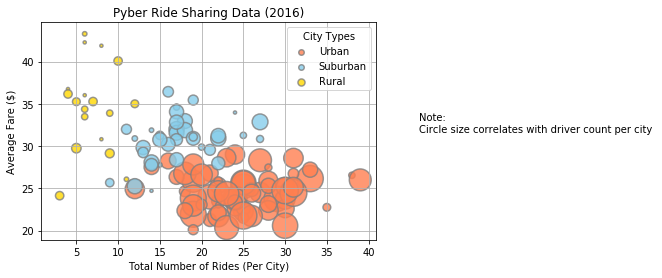

In [31]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

plt.scatter(urbanLoc["Total Number of Rides"], urbanLoc["Average Fare"], marker="o", facecolors="coral", 
            edgecolors="gray", alpha=0.8, s = urbanLoc["driver_count"] * 10, label = "Urban", linewidths = 1.5)

plt.scatter(suburbanLoc["Total Number of Rides"], suburbanLoc["Average Fare"], marker="o", facecolors="skyblue", 
            edgecolors="gray", alpha=0.8, s = suburbanLoc["driver_count"] * 10, label = "Suburban", linewidths = 1.5)

plt.scatter(ruralLoc["Total Number of Rides"], ruralLoc["Average Fare"], marker="o", facecolors="gold", 
            edgecolors="gray", alpha=0.8, s = ruralLoc["driver_count"] * 10, label = "Rural", linewidths = 1.5)


# Incorporate the other graph properties
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
# Create a legend
lgnd = plt.legend(loc="best", title= "City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(1, 0.5, "Note: \n Circle size correlates with driver count per city", wrap=True, fontsize=10)

# Save Figure

plt.savefig("../Images/Pyber Ride Sharing Data.png", bbox_inches="tight")
plt.show()

## Total Fares by City Type

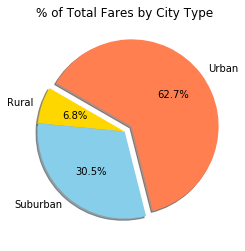

In [34]:
# Group by city type first
cityTypeGroup = df.groupby(["type"])
# Calculate sum for each city type to calculate fare
cityTypeSum = cityTypeGroup.sum()
cityTypeSum
totalFares = cityTypeSum["fare"]
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "skyblue", "coral"]
explode= (0, 0, 0.1)

plt.pie(totalFares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total fares by city type.png")
plt.show()

## Total Rides by City Type

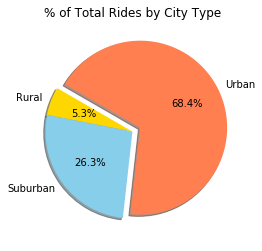

In [37]:
# Calculate Ride Percents
cityTypeCount = cityTypeGroup.count()
cityTypeCount
totalRides = cityTypeCount["city"]

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "skyblue", "coral"]
explode= (0, 0, 0.1)
plt.pie(totalRides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Total rides by city type.png")
plt.show()

## Total Drivers by City Type

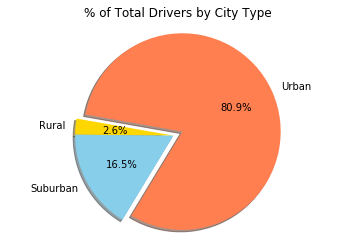

In [40]:

# Calculate Type Percents
citydfGroup= city_df.groupby(["type"])

totalDrivers= citydfGroup['driver_count'].sum()


# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors= ["gold", "skyblue", "coral"]
explode= (.0, 0, 0.1)

plt.pie(totalDrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.title('% of Total Drivers by City Type')
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Total drivers by city type.png")

#show
plt.show()

Trends
1) Urban cities account for the most rides, drivers, and total fares.
2) EVen though urban cities have the greatest fares in total, rural cities have the greatest average fare.
3) Not only do urban cities have the most drivers in general, they also seem to have the greatest number of drivers per city. This means that one city is not accounting for a large majority of drivers, but they are all accounting for the number of drivers fairly evenly.